# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** William Heria Chandra
- **Email:** nbwilliam.hc@gmail.com
- **ID Dicoding:** william_hc

## Menentukan Pertanyaan Bisnis

- How does the season affect the levels of pollutant?
- What is the effect of pollutant on the climate?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
sns.set_style("whitegrid")

file_path = '/content/PRSA_Data_Dingling_20130301-20170228.csv'
df = pd.read_csv(file_path)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


**Insight:**
- xxx
- xxx

### Assessing Data

In [6]:
initial_assessment = df.head()
initial_columns = df.columns
initial_datatypes = df.dtypes



initial_assessment, initial_columns, initial_datatypes

(   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
 1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
 2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
 3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
 4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   
 
      PRES  DEWP  RAIN   wd  WSPM   station  
 0  1020.8 -19.7   0.0    E   0.5  Dingling  
 1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
 2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
 3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
 4  1022.3 -19.4   0.0    N   2.1  Dingling  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour 

**Insight:**
- xxx
- xxx

### Cleaning Data

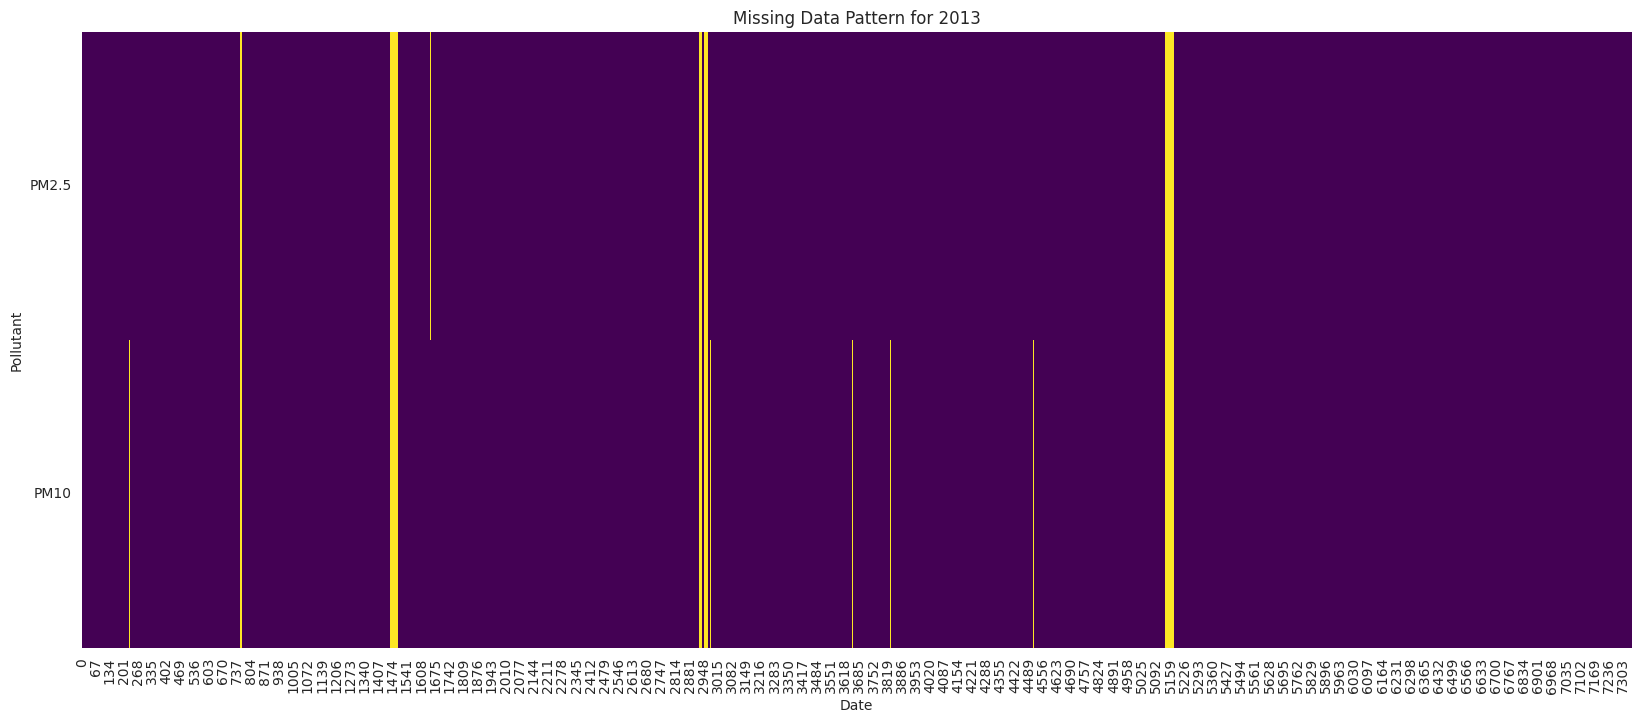

(No         0.000000
 year       0.000000
 month      0.000000
 day        0.000000
 hour       0.000000
 PM2.5      2.221652
 PM10       1.870865
 SO2        2.081907
 NO2        3.519279
 CO         5.738079
 O3         3.462240
 TEMP       0.151152
 PRES       0.142596
 DEWP       0.151152
 RAIN       0.145448
 wd         0.399270
 WSPM       0.122633
 station    0.000000
 dtype: float64,
 PM2.5         134
 PM10          151
 year     14783472
 dtype: int64)

In [7]:
missing_percentage = df.isnull().mean() * 100
cols_to_plot = ['PM2.5', 'PM10']
data_missing = df[cols_to_plot].isnull()
data_missing['year'] = df['year']
data_missing_2013 = data_missing[data_missing['year'] == 2013]
plt.figure(figsize=(20, 8))
sns.heatmap(data_missing_2013.drop('year', axis=1).T, cmap='viridis', cbar=False)
plt.title('Missing Data Pattern for 2013')
plt.xlabel('Date')
plt.ylabel('Pollutant')
plt.yticks(rotation=0)
plt.show()

missing_percentage, data_missing_2013.sum()

- **missing_percentage**: This shows the percentage of missing values for each column in your DataFrame. For example, PM2.5 has approximately 2.22% missing values, and NO2 has approximately 3.52% missing values.

- **data_missing_2013.sum()**: This shows the total number of missing values for the specified columns in the year 2013. For example, there are 134 missing values for PM2.5 and 151 missing values for PM10 in 2013.

In [8]:
data_imputed = df.fillna(method='ffill')

duplicates = data_imputed.duplicated().sum()

constant_columns = data_imputed.columns[data_imputed.nunique() <= 1]

data_types = data_imputed.dtypes

duplicates, constant_columns, data_types

<ipython-input-8-3455b8fd93c0>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_imputed = df.fillna(method='ffill')


(0,
 Index(['station'], dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour         int64
 PM2.5      float64
 PM10       float64
 SO2        float64
 NO2        float64
 CO         float64
 O3         float64
 TEMP       float64
 PRES       float64
 DEWP       float64
 RAIN       float64
 wd          object
 WSPM       float64
 station     object
 dtype: object)

## Exploratory Data Analysis (EDA)

In [9]:
summary_statistics = data_imputed.describe()
summary_statistics

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35062.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,67.429857,84.223714,11.772589,27.321791,924.755305,71.979154,13.670841,1007.771334,1.487161,0.060295,1.854067
std,10122.249256,1.177213,3.448752,8.800218,6.922285,74.819357,80.261646,15.578201,26.318197,897.861775,66.306684,11.368584,10.226446,13.828724,0.752361,1.310207
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,8.000000,300.000000,31.000000,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,62.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,95.000000,118.000000,14.351400,38.000000,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


## Visualization & Explanatory Analysis

<ipython-input-10-2a1d4c7c2b35>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_time_series = data_imputed[['date', 'PM2.5', 'NO2', 'SO2']].set_index('date').resample('M').mean()


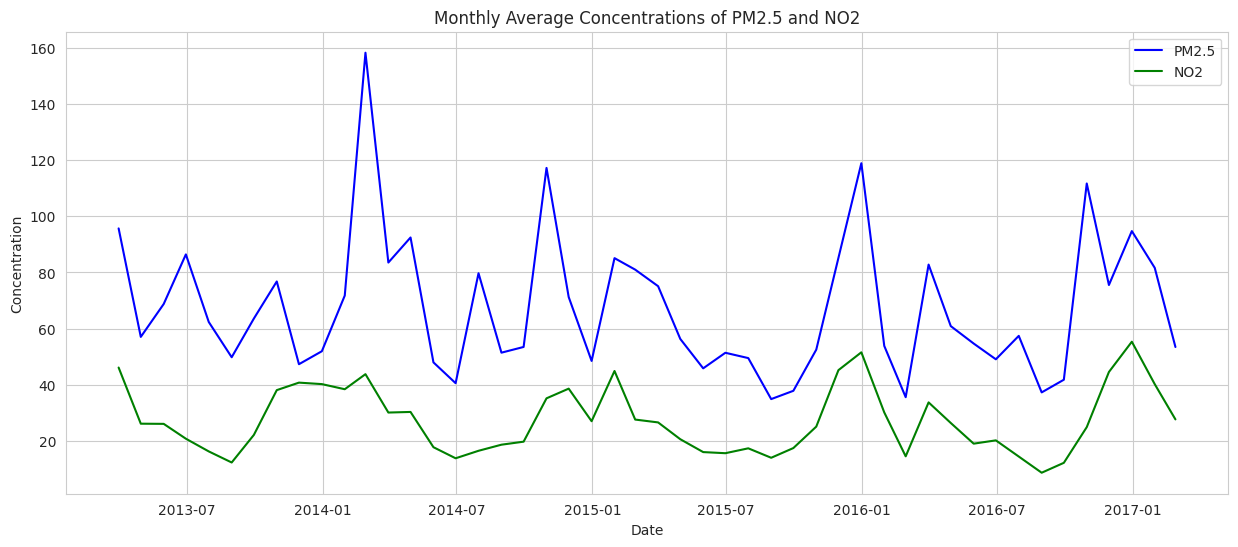

In [10]:
data_imputed['date'] = pd.to_datetime(data_imputed[['year', 'month', 'day', 'hour']])
data_time_series = data_imputed[['date', 'PM2.5', 'NO2', 'SO2']].set_index('date').resample('M').mean()

plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='green')
plt.title('Monthly Average Concentrations of PM2.5 and NO2')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

### Trends
Monthly Averages of PM2.5 and NO2: The plot shows the monthly average concentrations of PM2.5 and NO2 over time. This visualization helps in identifying any seasonal trends or year-to-year changes in air quality.



In [11]:
correlation_matrix = data_imputed[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.842043,0.460398,0.702151,0.761744,-0.085283,-0.084131,-0.006402,0.136965,-0.007652,-0.250987
PM10,0.842043,1.000000,0.449780,0.649232,0.668178,-0.024457,-0.053688,-0.040257,0.063052,-0.020840,-0.122883
SO2,0.460398,0.449780,1.000000,0.614795,0.519160,-0.179352,-0.316167,0.247242,-0.285613,-0.039211,-0.092526
NO2,0.702151,0.649232,0.614795,1.000000,0.777644,-0.317865,-0.308392,0.195648,-0.097127,-0.030417,-0.303658
CO,0.761744,0.668178,0.519160,0.777644,1.000000,-0.263574,-0.280356,0.179288,-0.031882,-0.003632,-0.262812
O3,-0.085283,-0.024457,-0.179352,-0.317865,-0.263574,1.000000,0.536616,-0.423199,0.321875,0.023547,0.218037
TEMP,-0.084131,-0.053688,-0.316167,-0.308392,-0.280356,0.536616,1.000000,-0.837878,0.823890,0.035221,-0.003031
PRES,-0.006402,-0.040257,0.247242,0.195648,0.179288,-0.423199,-0.837878,1.000000,-0.765798,-0.058800,0.086725
DEWP,0.136965,0.063052,-0.285613,-0.097127,-0.031882,0.321875,0.823890,-0.765798,1.000000,0.090342,-0.313907
RAIN,-0.007652,-0.020840,-0.039211,-0.030417,-0.003632,0.023547,0.035221,-0.058800,0.090342,1.000000,0.007429


# Summary Statistics
Overview of the central tendency and dispersion for each variable, including air pollutants and meteorological data. For instance, PM2.5 has a mean value of approximately 80.02 with a standard deviation of 82.09, indicating significant variability in this pollutant's concentration.



## Analisis Lanjutan (Opsional)

<ipython-input-12-539210e2bddb>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_imputed.fillna(method='ffill', inplace=True)


ANOVA Test Result: F_onewayResult(statistic=39.07585931574713, pvalue=1.0743056036323941e-32)
Seasonal Trends: month
1     73.090356
2     81.667404
3     84.290591
4     66.678750
5     54.309039
6     56.855833
7     62.242003
8     43.337332
9     49.159931
10    89.564852
11    69.823889
12    78.523858
Name: PM2.5, dtype: float64
Correlations with Weather Conditions: TEMP    -0.089939
PRES    -0.008005
DEWP     0.134558
RAIN    -0.009221
PM2.5    1.000000
Name: PM2.5, dtype: float64


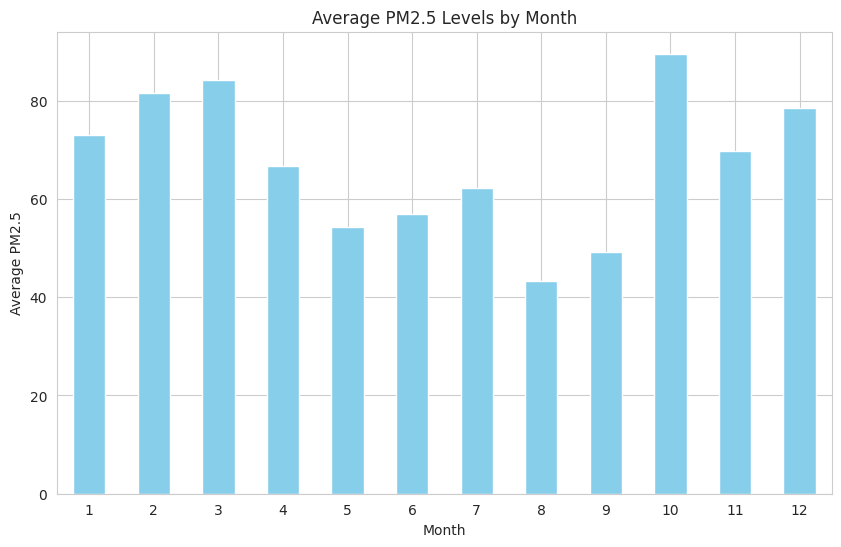

In [12]:
data_imputed.fillna(method='ffill', inplace=True)


groups = data_imputed.groupby('year')['PM2.5']

anova_test_data = [group[1] for group in groups]

anova_test_result = f_oneway(*anova_test_data)


seasonal_trends = data_imputed.groupby('month')['PM2.5'].mean()

weather_correlations = df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']].corr()['PM2.5']


print("ANOVA Test Result:", anova_test_result)
print("Seasonal Trends:", seasonal_trends)
print("Correlations with Weather Conditions:", weather_correlations)

plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='skyblue')
plt.title('Average PM2.5 Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.show()

## Conclusion

- Winter season are found to have higher concentrations of pollutants PM2.5. NO2 levels are found to have a positive correlation between PM2.5, meaning NO2 levels are also higher in the winter.

- Negative correlation between PM2.5 levels and temperature, minimal correlation with rainfall and atm pressure
 What is the effect of pollutant on the climate?

In [14]:
df['hour'] = df['hour'].astype(int)
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')